# **Photorealistic Style Transfer with WCT**


---


Photo style transfer is an optimization technique used to modify the style of an image while still preserving its content. It usually takes two images: a content image and a style image. Style transfer will blend two pictures together so the output image looks like the content image, but have the style of the style image.

This is implemented by optimizing the output image to match the content statistics of the content image and the style statistics of the style image, which are extracted from the images using convolutional networks.

The style transfer technique we are using is called WCT.

## **AutoEncoder**


---

"An autoencoder is a neural network architecture capable of discovering structure within data in order to develop a compressed representation of the input. Many different variants of the general autoencoder architecture exist with the goal of ensuring that the compressed representation represents meaningful attributes of the original data input" https://www.jeremyjordan.me/autoencoders/




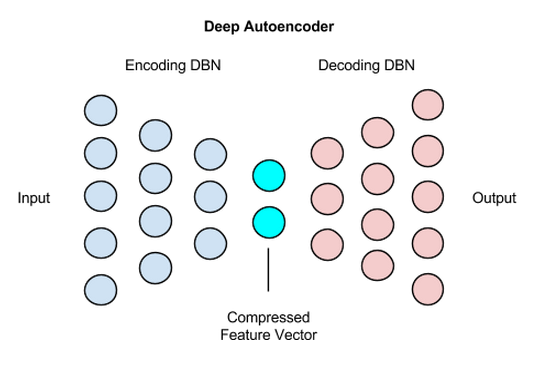




---



We need to make sure the version of the Pytorch and Torchvision is correct

In [ ]:
pip install torch==0.4.0 torchvision==0.2.0

In [ ]:
import torch.nn as nn
import torch


class encoder(nn.Module):
    def __init__(self,vgg):
        super(encoder,self).__init__()
        # vgg
        # 224 x 224
        self.conv1 = nn.Conv2d(3,3,1,1,0)
        self.conv1.weight = torch.nn.Parameter(vgg.get(0).weight.float())
        self.conv1.bias = torch.nn.Parameter(vgg.get(0).bias.float())
        self.reflecPad1 = nn.ReflectionPad2d((1,1,1,1))
        # 226 x 226

        self.conv2 = nn.Conv2d(3,64,3,1,0)
        self.conv2.weight = torch.nn.Parameter(vgg.get(2).weight.float())
        self.conv2.bias = torch.nn.Parameter(vgg.get(2).bias.float())
        self.relu2 = nn.ReLU(inplace=True)
        # 224 x 224

        self.reflecPad3 = nn.ReflectionPad2d((1,1,1,1))
        self.conv3 = nn.Conv2d(64,64,3,1,0)
        self.conv3.weight = torch.nn.Parameter(vgg.get(5).weight.float())
        self.conv3.bias = torch.nn.Parameter(vgg.get(5).bias.float())
        self.relu3 = nn.ReLU(inplace=True)
        # 224 x 224

        self.maxPool = nn.MaxPool2d(kernel_size=2,stride=2,return_indices = True)
        # 112 x 112

        self.reflecPad4 = nn.ReflectionPad2d((1,1,1,1))
        self.conv4 = nn.Conv2d(64,128,3,1,0)
        self.conv4.weight = torch.nn.Parameter(vgg.get(9).weight.float())
        self.conv4.bias = torch.nn.Parameter(vgg.get(9).bias.float())
        self.relu4 = nn.ReLU(inplace=True)
        # 112 x 112

        self.reflecPad5 = nn.ReflectionPad2d((1,1,1,1))
        self.conv5 = nn.Conv2d(128,128,3,1,0)
        self.conv5.weight = torch.nn.Parameter(vgg.get(12).weight.float())
        self.conv5.bias = torch.nn.Parameter(vgg.get(12).bias.float())
        self.relu5 = nn.ReLU(inplace=True)
        # 112 x 112

        self.maxPool2 = nn.MaxPool2d(kernel_size=2,stride=2,return_indices = True)
        # 56 x 56

        self.reflecPad6 = nn.ReflectionPad2d((1,1,1,1))
        self.conv6 = nn.Conv2d(128,256,3,1,0)
        self.conv6.weight = torch.nn.Parameter(vgg.get(16).weight.float())
        self.conv6.bias = torch.nn.Parameter(vgg.get(16).bias.float())
        self.relu6 = nn.ReLU(inplace=True)
        # 56 x 56

        self.reflecPad7 = nn.ReflectionPad2d((1,1,1,1))
        self.conv7 = nn.Conv2d(256,256,3,1,0)
        self.conv7.weight = torch.nn.Parameter(vgg.get(19).weight.float())
        self.conv7.bias = torch.nn.Parameter(vgg.get(19).bias.float())
        self.relu7 = nn.ReLU(inplace=True)
        # 56 x 56

        self.reflecPad8 = nn.ReflectionPad2d((1,1,1,1))
        self.conv8 = nn.Conv2d(256,256,3,1,0)
        self.conv8.weight = torch.nn.Parameter(vgg.get(22).weight.float())
        self.conv8.bias = torch.nn.Parameter(vgg.get(22).bias.float())
        self.relu8 = nn.ReLU(inplace=True)
        # 56 x 56

        self.reflecPad9 = nn.ReflectionPad2d((1,1,1,1))
        self.conv9 = nn.Conv2d(256,256,3,1,0)
        self.conv9.weight = torch.nn.Parameter(vgg.get(25).weight.float())
        self.conv9.bias = torch.nn.Parameter(vgg.get(25).bias.float())
        self.relu9 = nn.ReLU(inplace=True)
        # 56 x 56

        self.maxPool3 = nn.MaxPool2d(kernel_size=2,stride=2,return_indices = True)
        # 28 x 28

        self.reflecPad10 = nn.ReflectionPad2d((1,1,1,1))
        self.conv10 = nn.Conv2d(256,512,3,1,0)
        self.conv10.weight = torch.nn.Parameter(vgg.get(29).weight.float())
        self.conv10.bias = torch.nn.Parameter(vgg.get(29).bias.float())
        self.relu10 = nn.ReLU(inplace=True)
        # 28 x 28

        self.reflecPad11 = nn.ReflectionPad2d((1,1,1,1))
        self.conv11 = nn.Conv2d(512,512,3,1,0)
        self.conv11.weight = torch.nn.Parameter(vgg.get(32).weight.float())
        self.conv11.bias = torch.nn.Parameter(vgg.get(32).bias.float())
        self.relu11 = nn.ReLU(inplace=True)
        # 28 x 28

        self.reflecPad12 = nn.ReflectionPad2d((1,1,1,1))
        self.conv12 = nn.Conv2d(512,512,3,1,0)
        self.conv12.weight = torch.nn.Parameter(vgg.get(35).weight.float())
        self.conv12.bias = torch.nn.Parameter(vgg.get(35).bias.float())
        self.relu12 = nn.ReLU(inplace=True)
        # 28 x 28

        self.reflecPad13 = nn.ReflectionPad2d((1,1,1,1))
        self.conv13 = nn.Conv2d(512,512,3,1,0)
        self.conv13.weight = torch.nn.Parameter(vgg.get(38).weight.float())
        self.conv13.bias = torch.nn.Parameter(vgg.get(38).bias.float())
        self.relu13 = nn.ReLU(inplace=True)
        # 28 x 28

        self.maxPool4 = nn.MaxPool2d(kernel_size=2,stride=2,return_indices = True)
        # 14 x 14

        self.reflecPad14 = nn.ReflectionPad2d((1,1,1,1))
        self.conv14 = nn.Conv2d(512,512,3,1,0)
        self.conv14.weight = torch.nn.Parameter(vgg.get(42).weight.float())
        self.conv14.bias = torch.nn.Parameter(vgg.get(42).bias.float())
        self.relu14 = nn.ReLU(inplace=True)
        # 14 x 14
    def forward(self,x):
        out = self.conv1(x)
        out = self.reflecPad1(out)
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.reflecPad3(out)
        out = self.conv3(out)
        out = self.relu3(out)
        out,pool_idx = self.maxPool(out)
        out = self.reflecPad4(out)
        out = self.conv4(out)
        out = self.relu4(out)
        out = self.reflecPad5(out)
        out = self.conv5(out)
        out = self.relu5(out)
        out,pool_idx2 = self.maxPool2(out)
        out = self.reflecPad6(out)
        out = self.conv6(out)
        out = self.relu6(out)
        out = self.reflecPad7(out)
        out = self.conv7(out)
        out = self.relu7(out)
        out = self.reflecPad8(out)
        out = self.conv8(out)
        out = self.relu8(out)
        out = self.reflecPad9(out)
        out = self.conv9(out)
        out = self.relu9(out)
        out,pool_idx3 = self.maxPool3(out)
        out = self.reflecPad10(out)
        out = self.conv10(out)
        out = self.relu10(out)
        out = self.reflecPad11(out)
        out = self.conv11(out)
        out = self.relu11(out)
        out = self.reflecPad12(out)
        out = self.conv12(out)
        out = self.relu12(out)
        out = self.reflecPad13(out)
        out = self.conv13(out)
        out = self.relu13(out)
        out,pool_idx4 = self.maxPool4(out)
        out = self.reflecPad14(out)
        out = self.conv14(out)
        out = self.relu14(out)
        print(type(out))
        return out


class decoder(nn.Module):
    def __init__(self,d):
        super(decoder,self).__init__()

        # decoder
        self.reflecPad15 = nn.ReflectionPad2d((1,1,1,1))
        self.conv15 = nn.Conv2d(512,512,3,1,0)
        self.conv15.weight = torch.nn.Parameter(d.get(1).weight.float())
        self.conv15.bias = torch.nn.Parameter(d.get(1).bias.float())
        self.relu15 = nn.ReLU(inplace=True)

        self.unpool = nn.UpsamplingNearest2d(scale_factor=2)
        # 28 x 28

        self.reflecPad16 = nn.ReflectionPad2d((1,1,1,1))
        self.conv16 = nn.Conv2d(512,512,3,1,0)
        self.conv16.weight = torch.nn.Parameter(d.get(5).weight.float())
        self.conv16.bias = torch.nn.Parameter(d.get(5).bias.float())
        self.relu16 = nn.ReLU(inplace=True)
        # 28 x 28

        self.reflecPad17 = nn.ReflectionPad2d((1,1,1,1))
        self.conv17 = nn.Conv2d(512,512,3,1,0)
        self.conv17.weight = torch.nn.Parameter(d.get(8).weight.float())
        self.conv17.bias = torch.nn.Parameter(d.get(8).bias.float())
        self.relu17 = nn.ReLU(inplace=True)
        # 28 x 28

        self.reflecPad18 = nn.ReflectionPad2d((1,1,1,1))
        self.conv18 = nn.Conv2d(512,512,3,1,0)
        self.conv18.weight = torch.nn.Parameter(d.get(11).weight.float())
        self.conv18.bias = torch.nn.Parameter(d.get(11).bias.float())
        self.relu18 = nn.ReLU(inplace=True)
        # 28 x 28

        self.reflecPad19 = nn.ReflectionPad2d((1,1,1,1))
        self.conv19 = nn.Conv2d(512,256,3,1,0)
        self.conv19.weight = torch.nn.Parameter(d.get(14).weight.float())
        self.conv19.bias = torch.nn.Parameter(d.get(14).bias.float())
        self.relu19 = nn.ReLU(inplace=True)
        # 28 x 28

        self.unpool2 = nn.UpsamplingNearest2d(scale_factor=2)
        # 56 x 56

        self.reflecPad20 = nn.ReflectionPad2d((1,1,1,1))
        self.conv20 = nn.Conv2d(256,256,3,1,0)
        self.conv20.weight = torch.nn.Parameter(d.get(18).weight.float())
        self.conv20.bias = torch.nn.Parameter(d.get(18).bias.float())
        self.relu20 = nn.ReLU(inplace=True)
        # 56 x 56

        self.reflecPad21 = nn.ReflectionPad2d((1,1,1,1))
        self.conv21 = nn.Conv2d(256,256,3,1,0)
        self.conv21.weight = torch.nn.Parameter(d.get(21).weight.float())
        self.conv21.bias = torch.nn.Parameter(d.get(21).bias.float())
        self.relu21 = nn.ReLU(inplace=True)

        self.reflecPad22 = nn.ReflectionPad2d((1,1,1,1))
        self.conv22 = nn.Conv2d(256,256,3,1,0)
        self.conv22.weight = torch.nn.Parameter(d.get(24).weight.float())
        self.conv22.bias = torch.nn.Parameter(d.get(24).bias.float())
        self.relu22 = nn.ReLU(inplace=True)

        self.reflecPad23 = nn.ReflectionPad2d((1,1,1,1))
        self.conv23 = nn.Conv2d(256,128,3,1,0)
        self.conv23.weight = torch.nn.Parameter(d.get(27).weight.float())
        self.conv23.bias = torch.nn.Parameter(d.get(27).bias.float())
        self.relu23 = nn.ReLU(inplace=True)

        self.unpool3 = nn.UpsamplingNearest2d(scale_factor=2)
        # 112 X 112

        self.reflecPad24 = nn.ReflectionPad2d((1,1,1,1))
        self.conv24 = nn.Conv2d(128,128,3,1,0)
        self.conv24.weight = torch.nn.Parameter(d.get(31).weight.float())
        self.conv24.bias = torch.nn.Parameter(d.get(31).bias.float())
        self.relu24 = nn.ReLU(inplace=True)

        self.reflecPad25 = nn.ReflectionPad2d((1,1,1,1))
        self.conv25 = nn.Conv2d(128,64,3,1,0)
        self.conv25.weight = torch.nn.Parameter(d.get(34).weight.float())
        self.conv25.bias = torch.nn.Parameter(d.get(34).bias.float())
        self.relu25 = nn.ReLU(inplace=True)

        self.unpool4 = nn.UpsamplingNearest2d(scale_factor=2)

        self.reflecPad26 = nn.ReflectionPad2d((1,1,1,1))
        self.conv26 = nn.Conv2d(64,64,3,1,0)
        self.conv26.weight = torch.nn.Parameter(d.get(38).weight.float())
        self.conv26.bias = torch.nn.Parameter(d.get(38).bias.float())
        self.relu26 = nn.ReLU(inplace=True)

        self.reflecPad27 = nn.ReflectionPad2d((1,1,1,1))
        self.conv27 = nn.Conv2d(64,3,3,1,0)
        self.conv27.weight = torch.nn.Parameter(d.get(41).weight.float())
        self.conv27.bias = torch.nn.Parameter(d.get(41).bias.float())

    def forward(self,x):
        # decoder
        out = self.reflecPad15(x)
        out = self.conv15(out)
        out = self.relu15(out)
        out = self.unpool(out)
        out = self.reflecPad16(out)
        out = self.conv16(out)
        out = self.relu16(out)
        out = self.reflecPad17(out)
        out = self.conv17(out)
        out = self.relu17(out)
        out = self.reflecPad18(out)
        out = self.conv18(out)
        out = self.relu18(out)
        out = self.reflecPad19(out)
        out = self.conv19(out)
        out = self.relu19(out)
        out = self.unpool2(out)
        out = self.reflecPad20(out)
        out = self.conv20(out)
        out = self.relu20(out)
        out = self.reflecPad21(out)
        out = self.conv21(out)
        out = self.relu21(out)
        out = self.reflecPad22(out)
        out = self.conv22(out)
        out = self.relu22(out)
        out = self.reflecPad23(out)
        out = self.conv23(out)
        out = self.relu23(out)
        out = self.unpool3(out)
        out = self.reflecPad24(out)
        out = self.conv24(out)
        out = self.relu24(out)
        out = self.reflecPad25(out)
        out = self.conv25(out)
        out = self.relu25(out)
        out = self.unpool4(out)
        out = self.reflecPad26(out)
        out = self.conv26(out)
        out = self.relu26(out)
        out = self.reflecPad27(out)
        out = self.conv27(out)
        print(type(out))
        return out


### AutoEncoder Training


---


```
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = encoder5()
        self.decoder = decoder5()
    def forward(self, x):
        
        ### ENCODER
        encoded = self.encoder(x)
        
        ### DECODER
        decoded = self.decoder(encoded)
        return decoded

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
my_dataset = CustomDataset(path='data')
dataloader = DataLoader(my_dataset, batch_size=4,
                        shuffle=True)

for epoch in range(40):
    for batch_idx, batch in enumerate(dataloader):
        
        # don't need labels, only the images (features)
        image = batch[0]
        out = model(image)
        cost = criterion(out, image)
        optimizer.zero_grad()
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
    print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                %(epoch+1, epoch, batch_idx, 
                    len(dataloader), cost))
```



## **WCT**


---
WCT is the model that we used in between encoding and decoding to apply style transfer.

The goal of WCT is to directly transform the content image to match the covariance matrix of the style image. It consists of two steps,
whitening and coloring transform. it's a linear transform that doesn't require training. 

Here is a demonstration of the relation between encoder, decoder and  the WCT
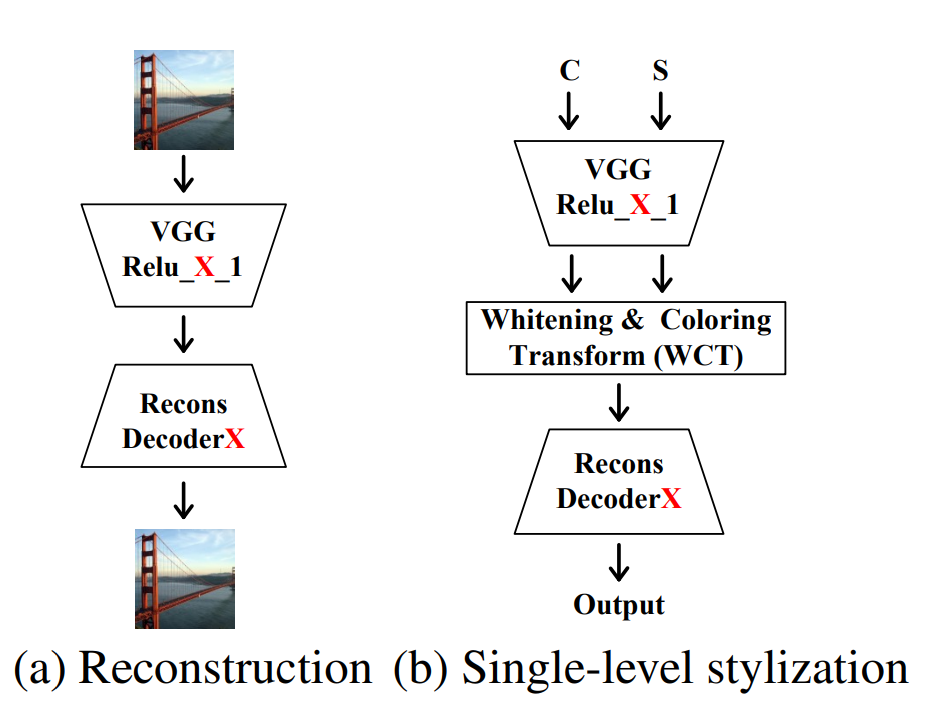


In [ ]:
from __future__ import division
import torch
from torch.utils.serialization import load_lua
import torchvision.transforms as transforms
import numpy as np
import argparse
import time
import os
from PIL import Image
import torch.nn as nn



class WCT(nn.Module):
    def __init__(self):
        super(WCT, self).__init__()
    def whiten_and_color(self,cF,sF):
        cFSize = cF.size()
        c_mean = torch.mean(cF,1) # c x (h x w)
        c_mean = c_mean.unsqueeze(1).expand_as(cF)
        cF = cF - c_mean

        contentConv = torch.mm(cF,cF.t()).div(cFSize[1]-1) + torch.eye(cFSize[0]).double()
        c_u,c_e,c_v = torch.svd(contentConv,some=False)

        k_c = cFSize[0]
        for i in range(cFSize[0]):
            if c_e[i] < 0.00001:
                k_c = i
                break

        sFSize = sF.size()
        s_mean = torch.mean(sF,1)
        sF = sF - s_mean.unsqueeze(1).expand_as(sF)
        styleConv = torch.mm(sF,sF.t()).div(sFSize[1]-1)
        s_u,s_e,s_v = torch.svd(styleConv,some=False)

        k_s = sFSize[0]
        for i in range(sFSize[0]):
            if s_e[i] < 0.00001:
                k_s = i
                break

        c_d = (c_e[0:k_c]).pow(-0.5)
        step1 = torch.mm(c_v[:,0:k_c],torch.diag(c_d))
        step2 = torch.mm(step1,(c_v[:,0:k_c].t()))
        whiten_cF = torch.mm(step2,cF)

        s_d = (s_e[0:k_s]).pow(0.5)
        targetFeature = torch.mm(torch.mm(torch.mm(s_v[:,0:k_s],torch.diag(s_d)),(s_v[:,0:k_s].t())),whiten_cF)
        targetFeature = targetFeature + s_mean.unsqueeze(1).expand_as(targetFeature)
        return targetFeature

    def transform(self,cF,sF,csF,alpha):
        cF = cF.double()
        sF = sF.double()
        C,W,H = cF.size(0),cF.size(1),cF.size(2)
        _,W1,H1 = sF.size(0),sF.size(1),sF.size(2)
        cFView = cF.view(C,-1)
        sFView = sF.view(C,-1)

        targetFeature = self.whiten_and_color(cFView,sFView)
        targetFeature = targetFeature.view_as(cF)
        ccsF = alpha * targetFeature + (1.0 - alpha) * cF
        ccsF = ccsF.float().unsqueeze(0)
        csF.data.resize_(ccsF.size()).copy_(ccsF)
        return csF

## **The Style Transfer Result Demonstration**

---



In [ ]:
from torch.utils.serialization import load_lua
vgg5 = load_lua("/content/vgg_normalised_conv5_1.t7");
decoder5_torch = load_lua("/content/feature_invertor_conv5_1.t7")

e5 = encoder(vgg5)
d5 = decoder(decoder5_torch)

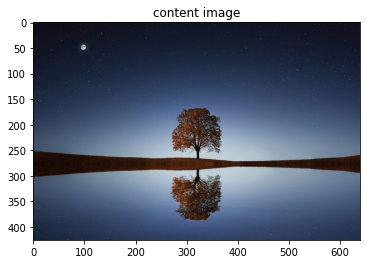

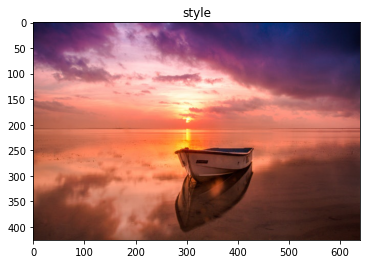

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
contentImg = Image.open("/content/demo04.jpg").convert('RGB')
styleImg = Image.open("/content/demo04s.jpg").convert('RGB')
plt.imshow(contentImg)
plt.title('content image')
plt.show()
plt.imshow(styleImg)
plt.title('style')
plt.show()

In [ ]:
contentImg = Image.open("/content/demo04.jpg").convert('RGB')
styleImg = Image.open("/content/demo04s.jpg").convert('RGB')
contentImg = transforms.ToTensor()(contentImg).unsqueeze(0)
styleImg = transforms.ToTensor()(styleImg).unsqueeze(0)
wct = WCT()
sF5 = e5(styleImg)
cF5 = e5(contentImg)
sF5 = sF5.data.cpu().squeeze(0)
cF5 = cF5.data.cpu().squeeze(0)
added = sF5.add(cF5)
div = torch.div(added, 2).unsqueeze(0)
csF = torch.Tensor()
csF = Variable(csF)
csF5 = wct.transform(cF5,sF5,csF,0.7)

Im5_recons = d5(cF5.unsqueeze(0))
Im5 = d5(csF5)
Im5div = d5(div)


<class 'torch.Tensor'>
<class 'torch.Tensor'>


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:173: UserWarning: nn.UpsamplingNearest2d is deprecated. Use nn.Upsample instead.
  warnings.warn("nn.UpsamplingNearest2d is deprecated. Use nn.Upsample instead.")


<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


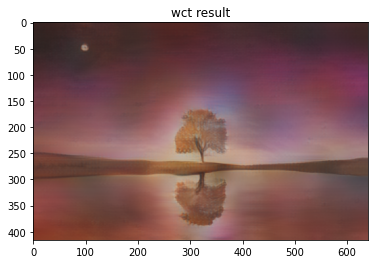

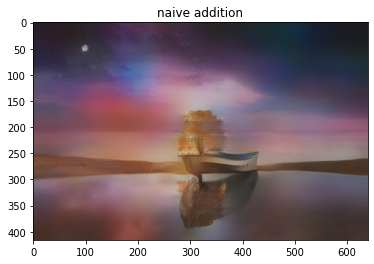

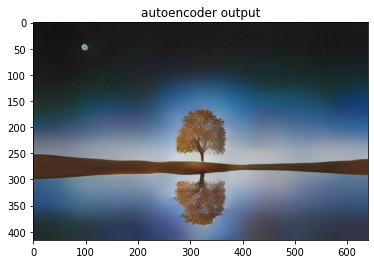

In [ ]:
from torchvision.transforms import ToPILImage
to_pil = ToPILImage()
img = to_pil(Im5.squeeze(0))
img2 = to_pil(Im5div.squeeze(0))
img3 = to_pil(Im5_recons.squeeze(0))

plt.imshow(img)
plt.title("wct result")
plt.show()
plt.imshow(img2)
plt.title("naive addition")
plt.show()
plt.imshow(img3)
plt.title("autoencoder output")
plt.show()

In [ ]:
vutils.save_image(Im5.data.cpu().float(),os.path.join("/content","decoded_image.jpg"))

Sources:

---
**Universal Style Transfer via Feature Transforms:**
---
The core concept of what our program does is from the following paper.

link: https://arxiv.org/abs/1705.08086

**Deep Transfer:**
---

  We used similar concepts described in these projects that we transfer the characteristics of the style image into the content image provided. Our structure is close to theirs, except that we only have one layer instead of multiple layers for the sake of simplifying the idea of image stlization.

  link: https://github.com/pietrocarbo/deep-transfer

  link: https://github.com/sunshineatnoon/PytorchWCT

**WCT2:**
---

  An advanced and revised version of WCT, which we ultimately decided to not implement due to it having too many extraneous features for demonstration purposes. However, it is worth taking a look at.
 
  link: https://github.com/clovaai/WCT2